## 1. Import needed libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys; sys.path.insert(0, '..')
from helpers import masked_seqs_stats
from Bio import SeqIO
%matplotlib inline

## 2. Load the vector-masked EST sequences and calculate stats

In [2]:
# Change this to be the path to the .screen files
path_to_seqs = '/home/maycon/Documents/LAB/eusociality/local_data/crossmatch_filtered'

xgroups_data = pd.DataFrame(columns=["seq_id", "taxon", "seq_len", "seq_xgroup_count", "xgroup_len", "dist_from_3", "dist_from_5", "seq_class"])

for seq_file in os.listdir(path_to_seqs):
    if seq_file.endswith('.screen'):
        taxon_name = seq_file.split('.')[0].split('_ests')[0]
        file_path = os.path.join(path_to_seqs, seq_file)
    
        for seq in SeqIO.parse(file_path, 'fasta'):
            if 'X' in seq.seq:
                current_seqlist = masked_seqs_stats.find_x_regions_and_calculate_stats(seq, taxon_name)

                if len(current_seqlist) > 0:
                    for seq_dict in current_seqlist:
                        xgroups_data = xgroups_data.append(seq_dict, ignore_index=True)
        
        nums_list = ['seq_len', 'seq_xgroup_count', 'xgroup_len', 'dist_from_3', 'dist_from_5']
        
        for col in nums_list:
            xgroups_data[col] = pd.to_numeric(xgroups_data[col], downcast='integer', errors='coerce')

In [3]:
xgroups_data

,seq_id,taxon,seq_len,seq_xgroup_count,xgroup_len,dist_from_3,dist_from_5,seq_class
0,DB735471.1,Apis_mellifera,497,1,110,3,384,7
1,DB777386.1,Apis_mellifera,487,1,199,288,0,3
2,DB772776.1,Apis_mellifera,531,1,427,102,2,4
3,DB773215.1,Apis_mellifera,495,1,323,168,4,4
4,DB747490.1,Apis_mellifera,531,1,455,0,76,6
...,...,...,...,...,...,...,...,...
564,EE149448.1,Solenopsis_invicta,379,1,81,0,298,5
565,EE148907.1,Solenopsis_invicta,351,1,37,314,0,3
566,EE148927.1,Solenopsis_invicta,372,1,103,269,0,3
567,EE148957.1,Solenopsis_invicta,334,1,37,297,0,3


In [4]:
xgroups_data.shape

(569, 8)

In [5]:
xgroups_data.dtypes

seq_id              object
taxon               object
seq_len              int16
seq_xgroup_count      int8
xgroup_len           int16
dist_from_3          int16
dist_from_5          int16
seq_class           object
dtype: object

In [6]:
xgroups_data.describe()

,seq_len,seq_xgroup_count,xgroup_len,dist_from_3,dist_from_5
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,490.042179,1.091388,156.010545,238.323374,95.708260
std,193.207703,0.306180,195.487284,218.662944,166.647418
min,53.000000,1.000000,32.000000,0.000000,0.000000
25%,362.000000,1.000000,53.000000,12.000000,8.000000
50%,484.000000,1.000000,72.000000,251.000000,21.000000
75%,607.000000,1.000000,123.000000,383.000000,47.000000
max,1419.000000,3.000000,873.000000,1331.000000,882.000000


## 3. Plotting the stats

In [7]:
sns.set_theme()

### 3.1. By xgroup length per taxon

Text(0.5, 8.95999999999998, 'Xgroup length')

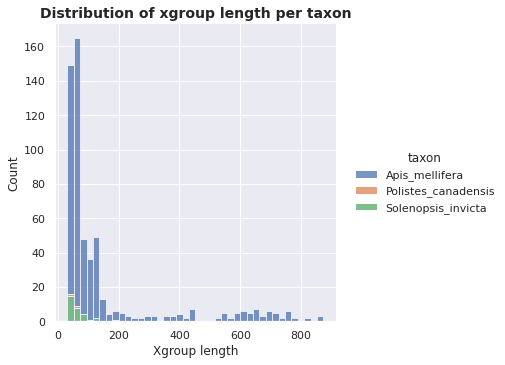

In [8]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', multiple='stack')
plt.title('Distribution of xgroup length per taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')

Text(0.5, 8.95999999999998, 'Xgroup length')

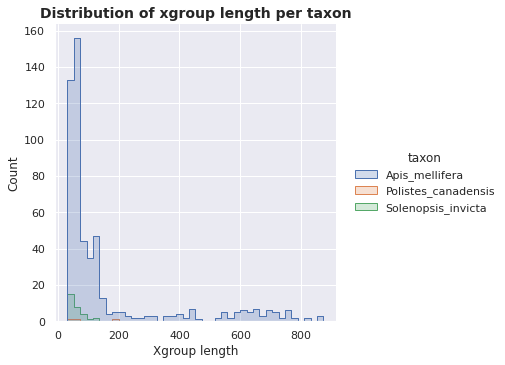

In [9]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', element='step')
plt.title('Distribution of xgroup length per taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')

#### Normalizing by density

Text(0.5, 8.95999999999998, 'Xgroup length')

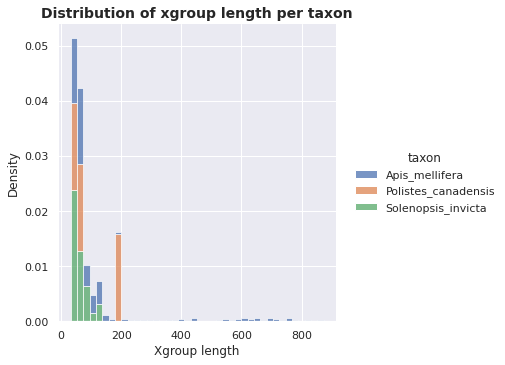

In [10]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', multiple='stack', stat='density', common_norm=False)
plt.title('Distribution of xgroup length per taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')

#### Scatterplots of xgroup length by seq length

Text(0, 0.5, 'Seq length')

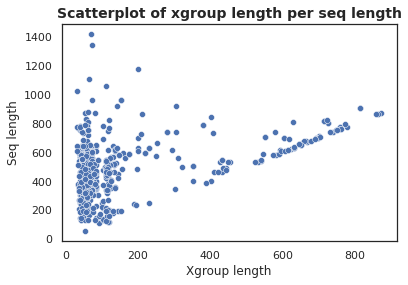

In [11]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='xgroup_len', y='seq_len')
plt.title('Scatterplot of xgroup length per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')
plt.ylabel('Seq length')

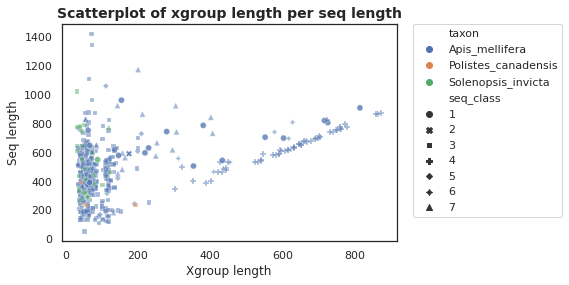

In [12]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='xgroup_len', y='seq_len', hue='taxon', style='seq_class', alpha=.5)
plt.title('Scatterplot of xgroup length per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3.2. Xgroup distance from 5' and 3'

In [13]:
sns.set_theme()

#### From 5'

Text(0.5, 8.95999999999998, "Xgroup distance to 5'")

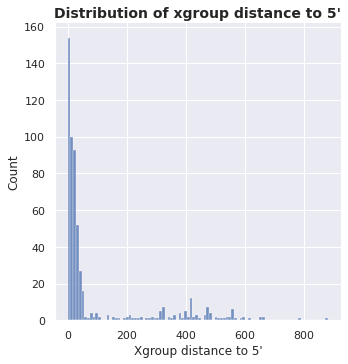

In [14]:
sns.displot(data=xgroups_data, x='dist_from_5')
plt.title('Distribution of xgroup distance to 5\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 5'")

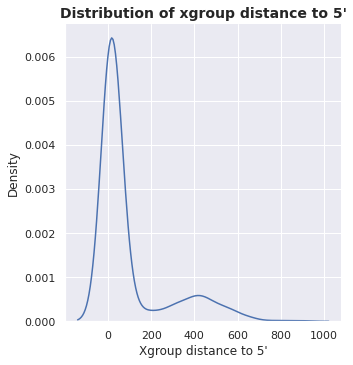

In [15]:
sns.displot(data=xgroups_data, x='dist_from_5', kind='kde')
plt.title('Distribution of xgroup distance to 5\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 5'")

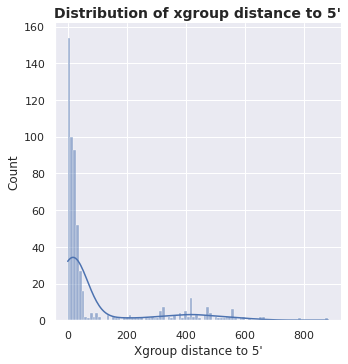

In [16]:
sns.displot(data=xgroups_data, x='dist_from_5', kde=True)
plt.title('Distribution of xgroup distance to 5\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')

Text(0, 0.5, 'Seq length')

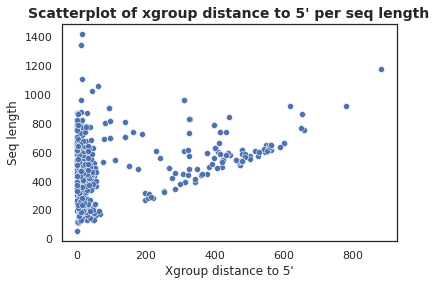

In [17]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='dist_from_5', y='seq_len')
plt.title('Scatterplot of xgroup distance to 5\' per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')
plt.ylabel('Seq length')

#### From 3'

In [18]:
sns.set_theme()

Text(0.5, 8.95999999999998, "Xgroup distance to 3'")

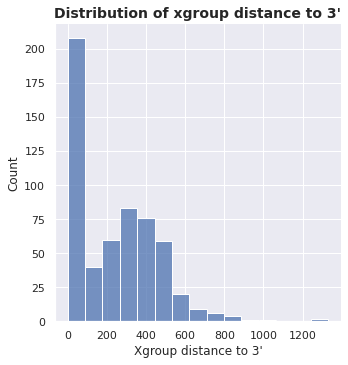

In [19]:
sns.displot(data=xgroups_data, x='dist_from_3')
plt.title('Distribution of xgroup distance to 3\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 3'")

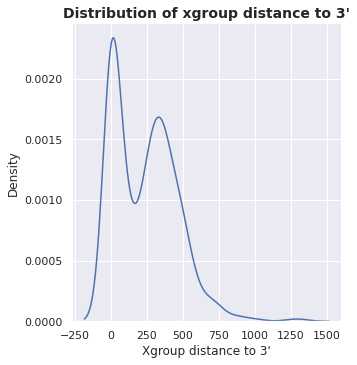

In [20]:
sns.displot(data=xgroups_data, x='dist_from_3', kind='kde')
plt.title('Distribution of xgroup distance to 3\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 3'")

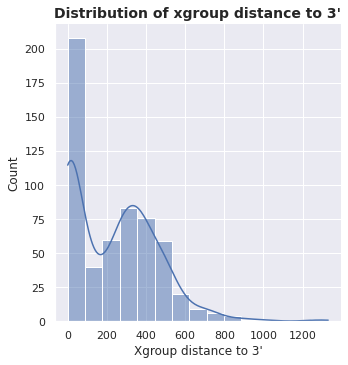

In [21]:
sns.displot(data=xgroups_data, x='dist_from_3', kde=True)
plt.title('Distribution of xgroup distance to 3\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')

Text(0, 0.5, 'Seq length')

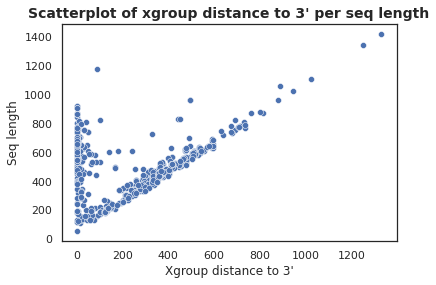

In [22]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='dist_from_3', y='seq_len')
plt.title('Scatterplot of xgroup distance to 3\' per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')
plt.ylabel('Seq length')

### 3.3. EST class

In [23]:
sns.set_theme()

Text(0.5, 8.95999999999998, 'EST sequence class')

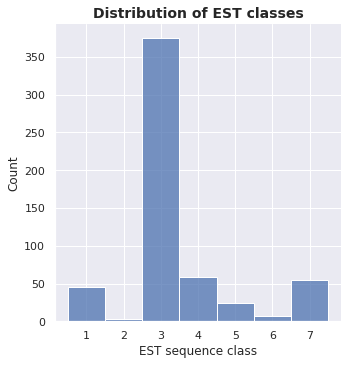

In [24]:
sns.displot(data=xgroups_data, x='seq_class', discrete=True)
plt.title('Distribution of EST classes', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')

#### By taxon

Text(0.5, 8.95999999999998, 'EST sequence class')

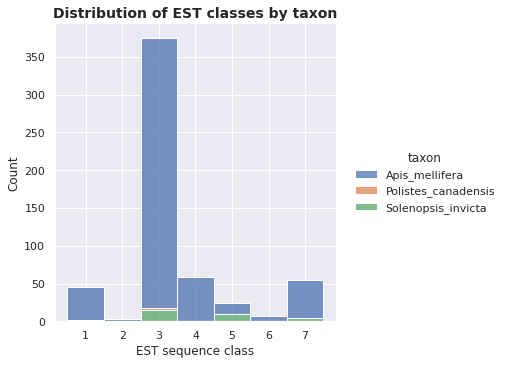

In [25]:
sns.displot(data=xgroups_data, x='seq_class', discrete=True, hue='taxon', multiple='stack')
plt.title('Distribution of EST classes by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')

Text(0.5, 8.95999999999998, 'EST sequence class')

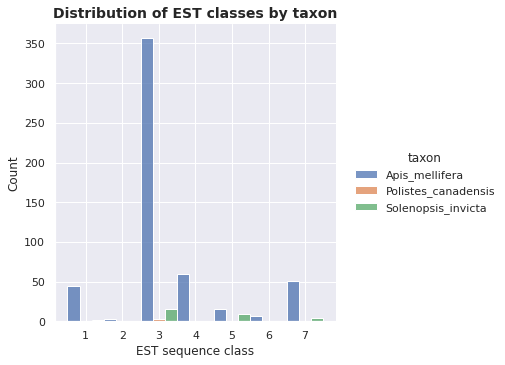

In [26]:
sns.displot(data=xgroups_data, x='seq_class', discrete=True, hue='taxon', multiple='dodge')
plt.title('Distribution of EST classes by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')

#### Boxplots of EST classes

Text(0, 0.5, 'Seq length')

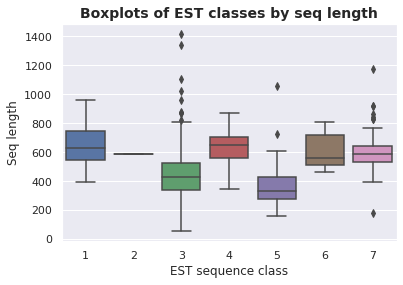

In [27]:
sns.boxplot(data=xgroups_data, x='seq_class', y='seq_len')
plt.title('Boxplots of EST classes by seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')

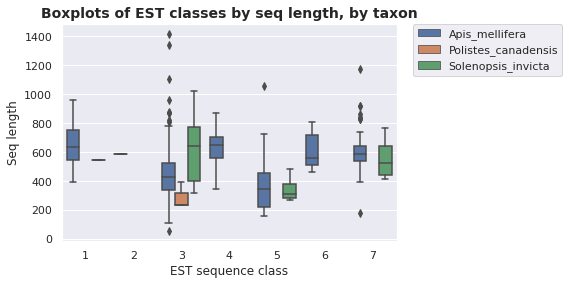

In [28]:
sns.boxplot(data=xgroups_data, x='seq_class', y='seq_len', hue='taxon')
plt.title('Boxplots of EST classes by seq length, by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Stripplot of EST classes

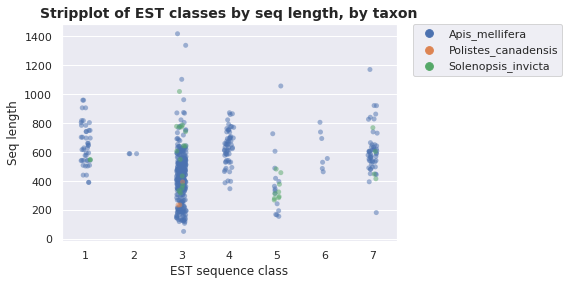

In [29]:
sns.stripplot(data=xgroups_data, x='seq_class', y='seq_len', hue='taxon', alpha=.5)
plt.title('Stripplot of EST classes by seq length, by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Barplots of EST classes

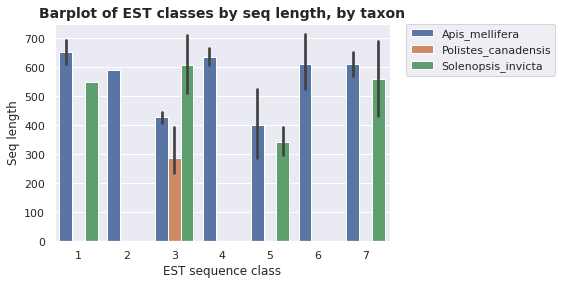

In [30]:
sns.barplot(data=xgroups_data, x='seq_class', y='seq_len', hue='taxon')
plt.title('Barplot of EST classes by seq length, by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

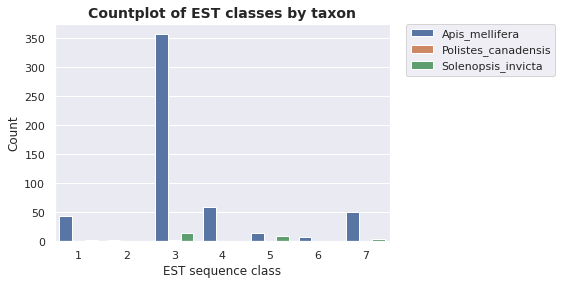

In [31]:
sns.countplot(data=xgroups_data, x='seq_class', hue='taxon')
plt.title('Countplot of EST classes by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 4. Filtering and trimming EST sequences based on presence of vectors and sequence class

In [32]:
from helpers import filter_seqs

### 4.1. Loading the length- and rRNA-filtered EST sequences, looping through, filtering sequences and outputting filtered files

In [49]:
classes_to_filter = [1, 3, 6, 7]
path_to_clean_seqs = '/home/maycon/Documents/LAB/eusociality/local_data/blast_removal_results'

for x_file in os.listdir(path_to_seqs):
    if x_file.endswith('.screen'):
        for clean_file in os.listdir(path_to_clean_seqs):
            if clean_file.endswith('.fasta') and (clean_file.split('_')[0] == x_file.split('_')[0]):
                x_input_file = os.path.join(path_to_seqs, x_file)
                clean_input_file = os.path.join(path_to_clean_seqs, clean_file)

                org_name = '_'.join(x_file.split('.')[0].split('_')[:2])
                out_name = f"{org_name}_ests_len_blast_vector_filtered.fasta"
                out_dir = '/home/maycon/Documents/LAB/eusociality/local_data/len_blast_vec_filtered'
                out_path = os.path.join(out_dir, out_name)

                print(org_name, out_path)
                
                with open(out_path, 'a') as out_file:
                    clean_seqs = list(SeqIO.parse(clean_input_file, 'fasta'))

                    for seq in SeqIO.parse(input_file, 'fasta'):
                        selector = xgroups_data['seq_id'] == seq.id
                        selected = xgroups_data[selector].reset_index()
                        
                        if not selected.empty:
                            seq_class = selected.iloc[0]['seq_class']
                            
                            if seq_class == 4:
                                continue
                            elif seq_class in classes_to_filter:
                                seq.seq = filter_seqs.process_seq_by_class(seq.seq, seq_class)
                                out_file.write(seq.format('fasta'))
                            else:
                                for clean_seq in clean_seqs:
                                    if clean_seq.id == seq.id:
                                        out_file.write(clean_seq.format('fasta'))

Apis_mellifera /home/maycon/Documents/LAB/eusociality/local_data/len_blast_vec_filtered/Apis_mellifera_ests_len_blast_vector_filtered.fasta
Polistes_canadensis /home/maycon/Documents/LAB/eusociality/local_data/len_blast_vec_filtered/Polistes_canadensis_ests_len_blast_vector_filtered.fasta
Solenopsis_invicta /home/maycon/Documents/LAB/eusociality/local_data/len_blast_vec_filtered/Solenopsis_invicta_ests_len_blast_vector_filtered.fasta
